In [6]:
import numpy as np
import sys
%cd ../src/fbi/
sys.path.insert(1, os.getcwd())
from optimizers import Optimizer
import matplotlib.pyplot as plt
import time
#  non-convex function to test the performance of methods with optimum at -1,1
fx = lambda x, y: (1 - x)**2 + 100*(y - x**2)**2
x = np.linspace(-3,3,200)
y = np.linspace(-3,3,200)
X, Y = np.meshgrid(x, y)
Z = fx(X,Y)
x = 2
y = 2
x_init = [x,y]
opt_x = [-1,1]

[Errno 2] No such file or directory: '../src/fbi/'
/home/gwan/Homework/cs107/git/cs107_project/src/fbi


In [7]:
def trace_plot(optimizers, fx,x_init,n_iter):
    x = np.linspace(-3,3,200)
    y = np.linspace(-3,3,200)
    X, Y = np.meshgrid(x, y)
    Z = fx(X,Y)
    fig = plt.figure(figsize = (16,8))
    ax = fig.add_subplot(1, 2, 1, projection='3d')
    iter_xs = []
    iter_ys = []
    iter_zs = []
    for k,v in optimizers.items():
        time,iter_z,iter_xy = v(x_init, fx, n_iter,verbose = True)
        iter_z = np.array(iter_z)
        iter_x = np.array(iter_xy)[:,0]
        iter_y = np.array(iter_xy)[:,1]
        iter_xs.append(iter_x)
        iter_ys.append(iter_y)
        iter_zs.append(iter_z)
        ax.plot_surface(X,Y,Z,rstride = 5, cstride = 5, cmap = 'jet', alpha = .4, edgecolor = 'none' )
        ax.plot(iter_x,iter_y, iter_z, marker = '*', alpha = .4,label = k)
        ax.legend()
        ax.set_title('f(x,y) = (1 - x)^2 + 100*(y - x^2)^2')
        ax.view_init(65, 34)
        ax.set_xlabel('x')
        ax.set_ylabel('y')
    plt.show()
    return iter_xs,iter_ys,iter_zs

In [8]:
optimizers = {"Momentum": Optimizer.momentum , "ADAGRAD": Optimizer.ADAGRAD,'GradientDescent': Optimizer.gradient_descent}

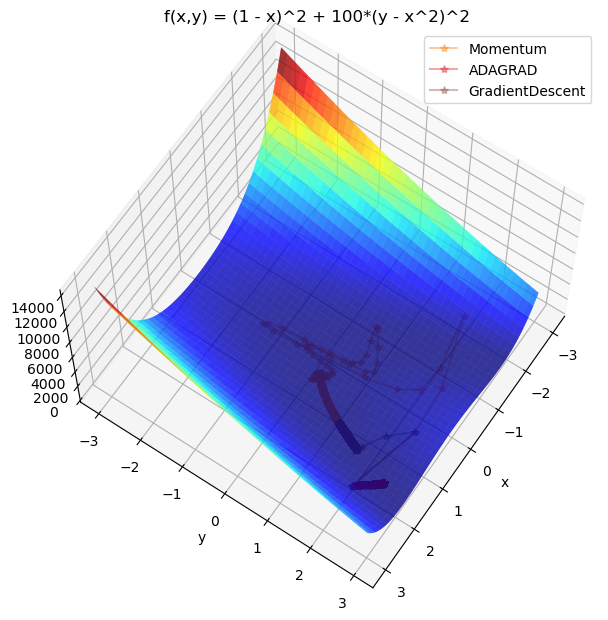

In [14]:
x,y,z = trace_plot(optimizers,fx,x_init,n_iter=10000) # Add more to the input dict for more plots

In [23]:
out = [set(),set(),set()]
for i,k in enumerate(optimizers.keys()):
    x[i] = x[i][:1000]
    y[i] = y[i][:1000]
    z[i] = z[i][:1000]
    for j in range(len(x[i])):
        out[i].add((x[i][j],y[i][j],"%.32f" % z[i][j]))

{(0.689643948981751, 0.475015899282639, '0.09635602872737510093958945844861'),
 (0.8317553769343292,
  0.6910746655365227,
  '0.02836136028413397541791951539381'),
 (0.8527019511353142,
  0.7264555906163979,
  '0.02173832116352650625779041604346'),
 (0.9703181061569647,
  0.9413962815310674,
  '0.00088247760604540374969328997423'),
 (0.9741843598707012,
  0.9489302232964953,
  '0.00066754859372624645707378077120'),
 (0.4596321180177832,
  0.22059397361843022,
  '0.30070661099159673446123974827060'),
 (0.35309221811508695,
  0.14485382129341373,
  '0.45921173491658051624142444779864'),
 (0.97057670348445, 0.941899264379158, '0.00086716733067771455383682122076'),
 (-0.6857339167999994, 2.3116808, '341.93543371775393779898877255618572'),
 (0.9227596043079089,
  0.8511612835969712,
  '0.00597657656938173353911025742491'),
 (0.9876046983615456,
  0.9753130628035206,
  '0.00015389327698203461038638228953'),
 (0.9048968809640076,
  0.8184350759601856,
  '0.00906086746972607944006217195465'),
